In [1]:
from __future__ import division, print_function

from IPython.core.display import HTML, Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Plotting with Pandas

## Agenda
- Line plots
- Bar plots
- Scatter plots
- Histograms
- MPL object model

In [2]:
PATH = '/Users/ac/Desktop/'

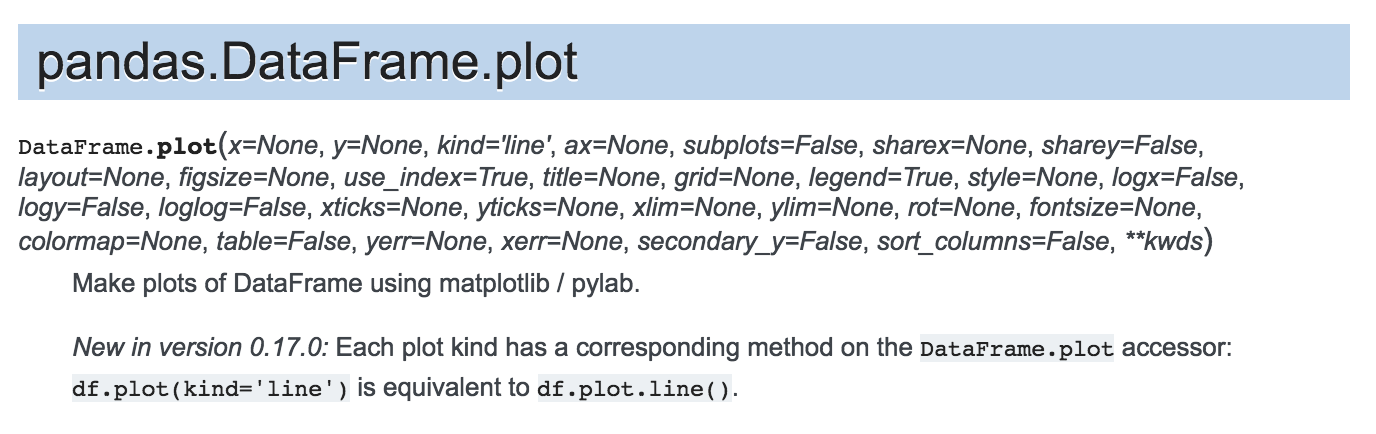

In [3]:
Image(PATH + 'pandas_plot.png')

## Import our data

In [4]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [5]:
df

,col1,col2,col3,col4
a,1.404882,-0.507066,-1.465668,-0.542575
b,0.090102,-0.798843,-0.559615,0.535209
c,0.806241,1.881684,1.673087,0.098070
d,0.486048,-0.219589,-0.271956,0.329109
e,0.671622,-0.519276,0.522670,0.558213
f,1.671930,1.213875,-0.799856,-0.010716
g,-0.000854,-0.421960,0.056565,0.764034
h,0.304076,-0.103490,0.405632,0.292079
i,-1.318135,0.693433,-0.840985,0.065676
j,-0.242148,1.834941,0.968939,-0.545130


## Line plot - DataFrame

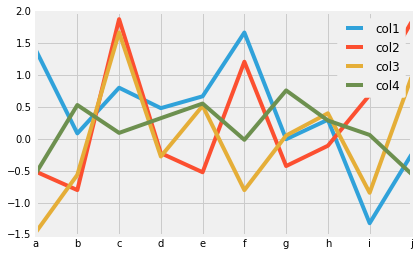

In [6]:
df.plot()

### <ul> Line plots are the default plot in pandas

## Line plot - Series

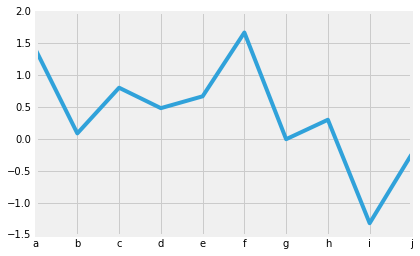

In [7]:
df['col1'].plot()

## We can pass in parameters to change the dimensions and the size

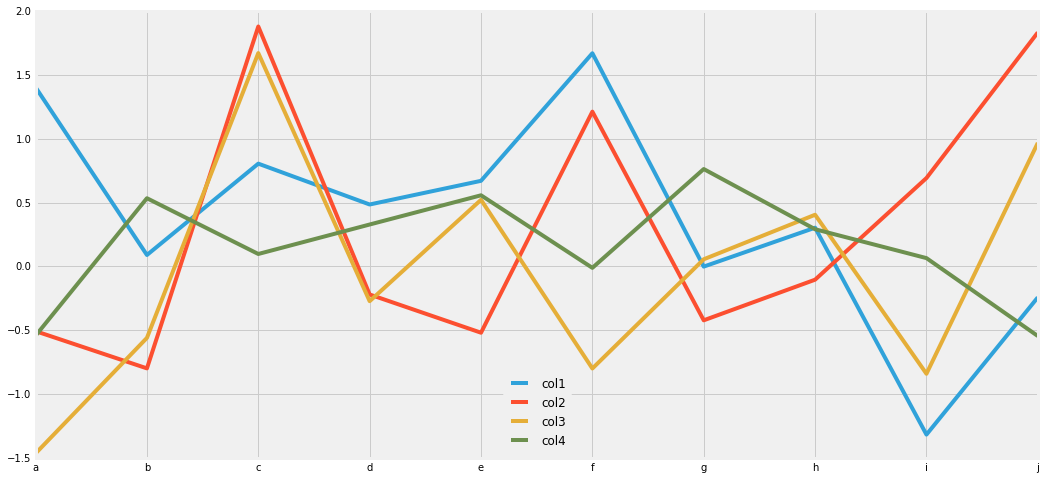

In [8]:
df.plot(figsize=(16,8))

### <ul>figsize(width, height)

## We can change the color

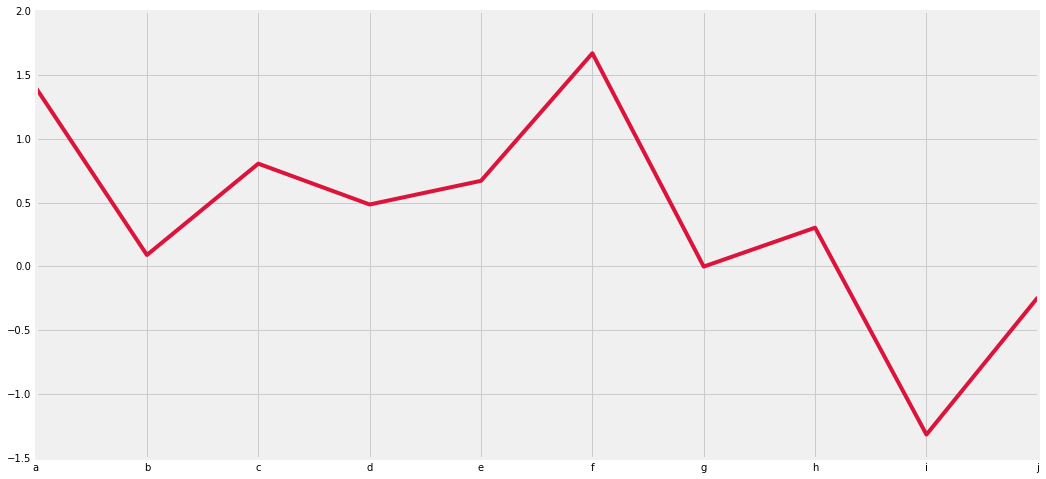

In [9]:
df['col1'].plot(color='crimson', figsize=(16,8))

## We can change the style - markers

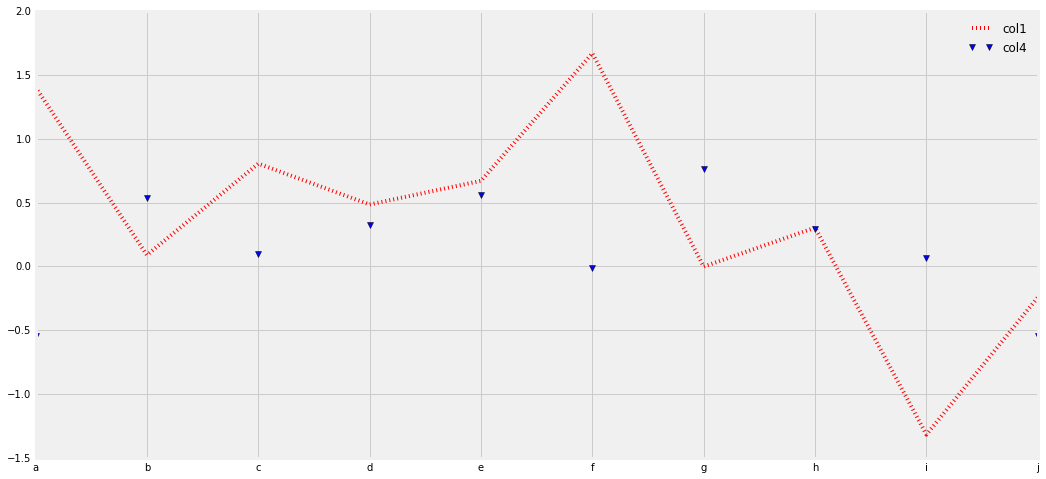

In [10]:
df[['col1', 'col4']].plot(figsize=(16,8),\
                          style={'col1': ':r', 'col4': 'vb'})

## E1. Using the df, create a line plot of col2 and col3. For col2 use a green o and for col3 use a blue dashed line. Set the width to 12 and the height to 8.

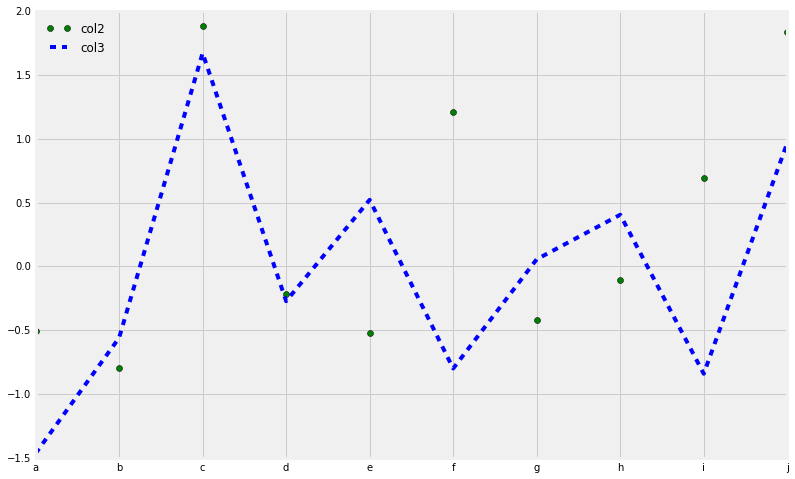

In [11]:
df[['col2','col3']].plot(figsize=(12,8),\
                         style={'col2': 'og', 'col3': '--b'});

## We can change the visible ticks and their size

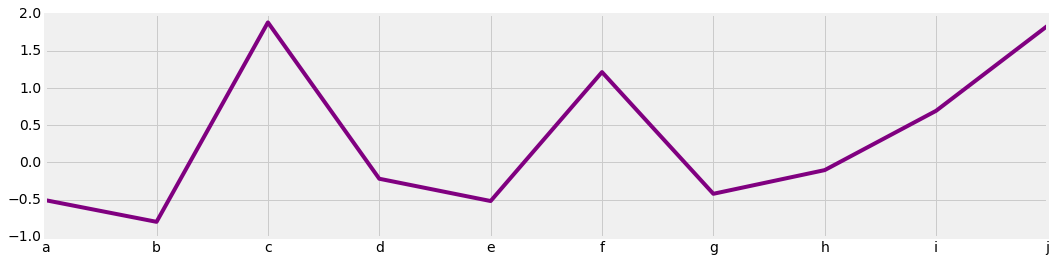

In [12]:
df['col2'].plot(figsize=(16,4), color='purple', fontsize=14)

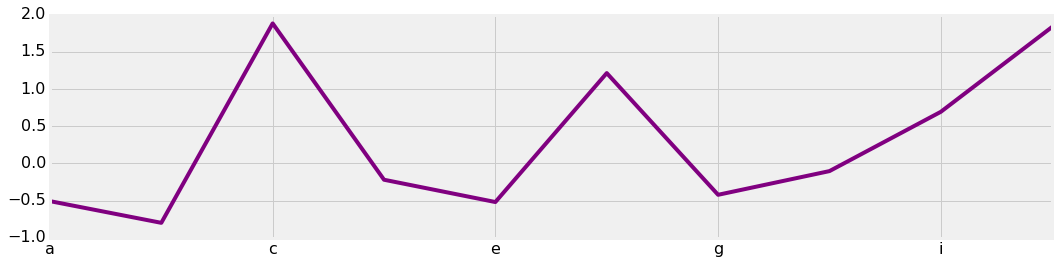

In [13]:
ticks_to_show = [x for x in range(len(df['col2'].index)) if x%2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16)

## We can change the label rotation

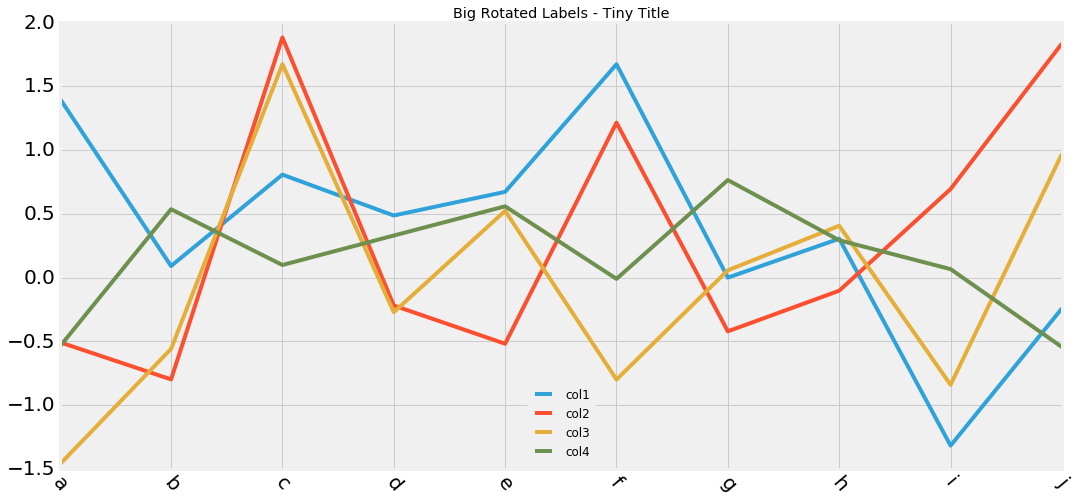

In [14]:
df.plot(figsize=(16,8), fontsize=20, rot=-50, title='Big Rotated Labels - Tiny Title')

### E2. Create a line chart with col4. Rotate the labels 90 degrees and give them a fontsize of 16. Set the color to dark orange. Set the title to "My Cool Plot". Set the figure size to 14 by 7.

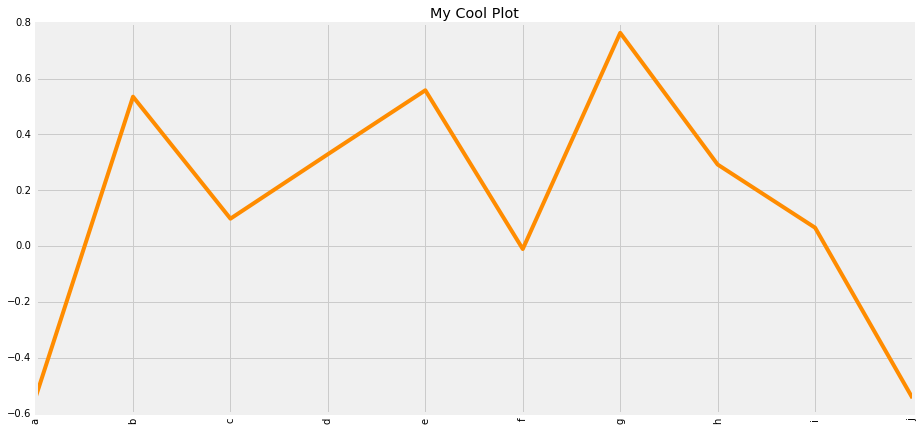

In [15]:
df['col4'].plot(kind='line', title='My Cool Plot',\
                c='darkorange', rot=90, figsize=(14,7))

## All the functionality of Matplotlib is available

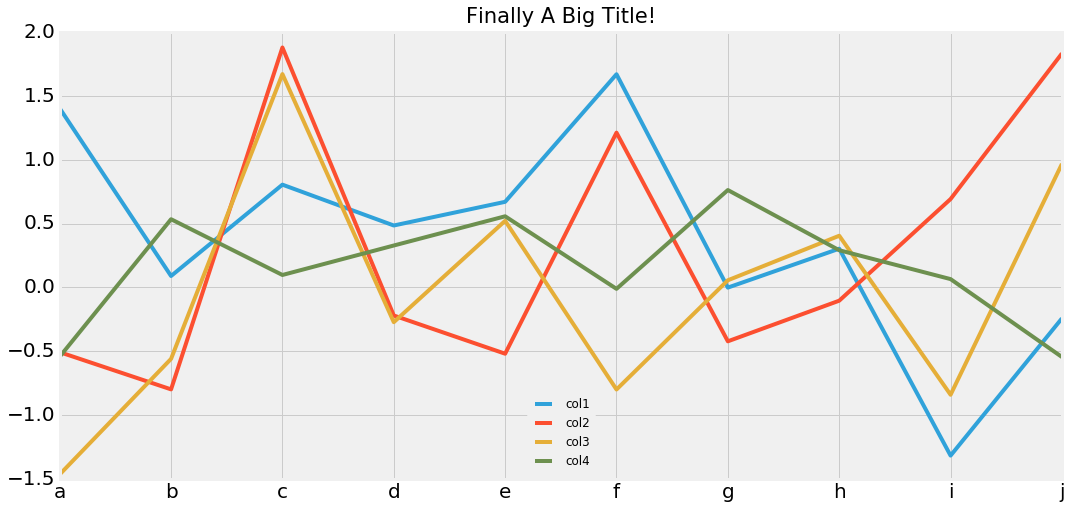

In [16]:
fig = df.plot(figsize=(16,8), fontsize=20)
ax = plt.gca()

ax.set_title('Finally A Big Title!', fontsize=21, y=1.01)

#### E3. Create a plot using the full data frame. Set the figure size to 16 by 8. Give it any title you want with a fontsize of 22. Move the title so that it is in the the body of the graph. Set a y label  of "this is my y axis" and an x label equal to "this is my x axis". Give both labels a fontsize of 16. Rotate your x axis label - what you just created - 180 degrees.

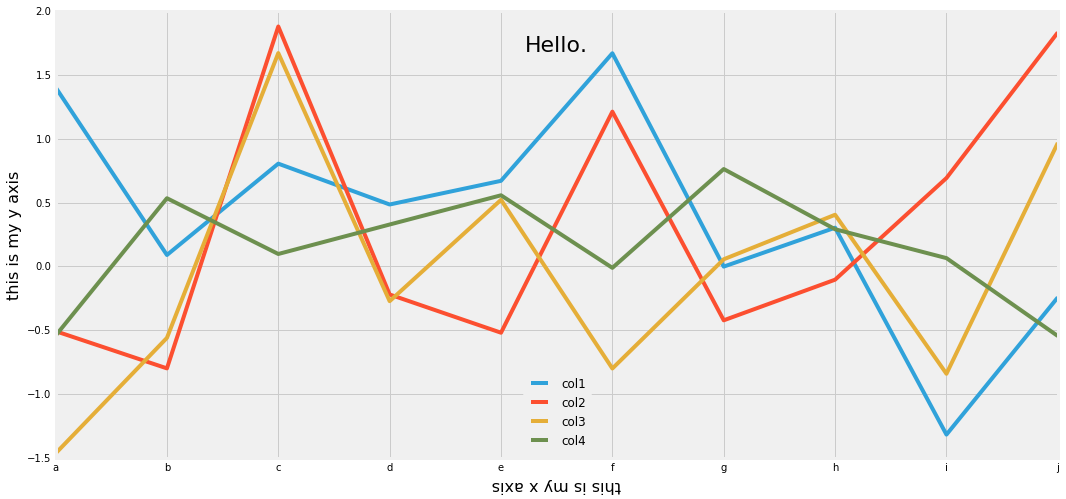

In [17]:
fig = df.plot(figsize=(16,8))
ax = plt.gca()
ax.set_title('Hello.', fontsize=22, y=.90)
ax.set_ylabel('this is my y axis', fontsize=16)
ax.set_xlabel('this is my x axis', fontsize=16, rotation=180)

# Bar Plots

## Series

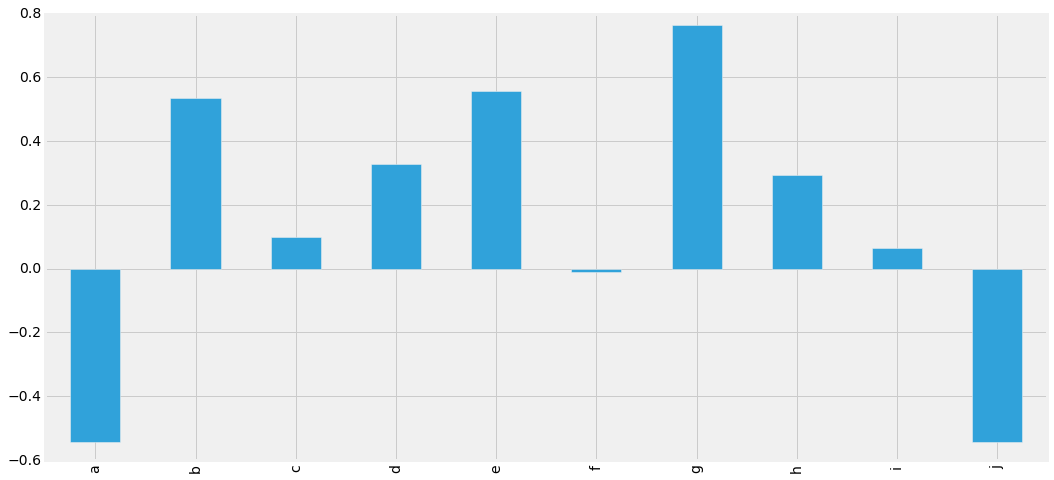

In [18]:
df['col4'].plot(kind='bar', figsize=(16,8), fontsize=14) 

## Using matplotlib commands we can get fancy

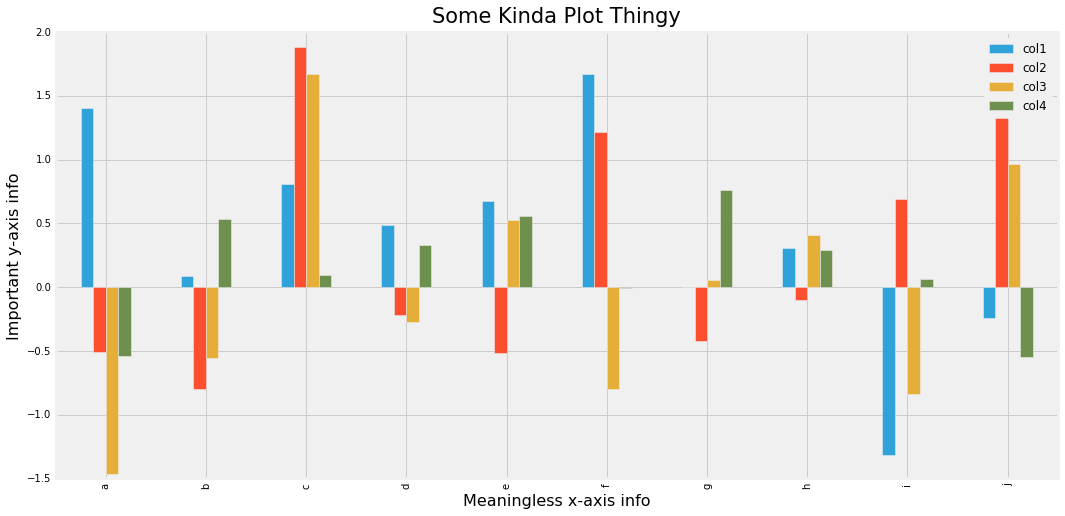

In [19]:
fig = df.plot(kind='bar', figsize=(16,8))
ax = plt.gca()
# set the title
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01)
# move the legend
ax.legend(loc=1)
# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16)
# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

## We can switch to horizontal bars...

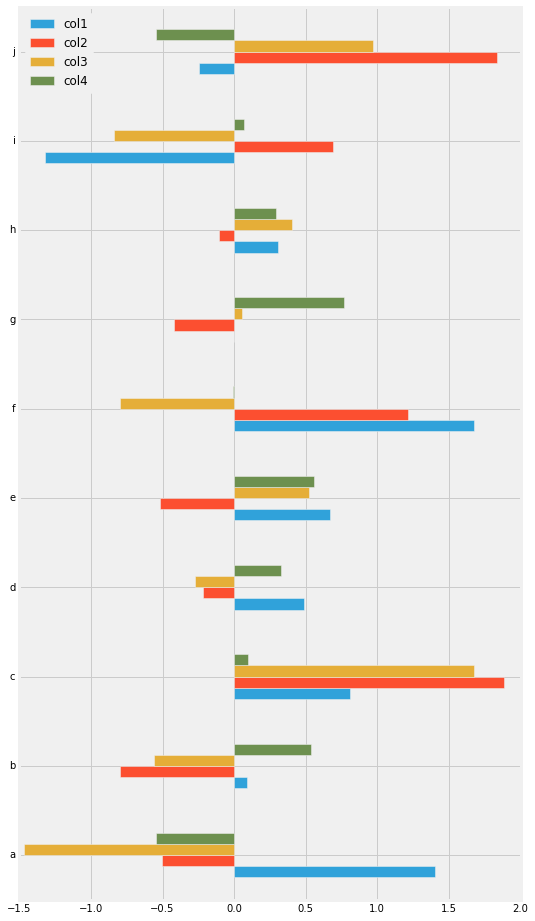

In [20]:
df.plot(kind='barh', figsize=(8,16))

## E4. Create a bar chart using col1 and col2. Give it a large title of your choosing. Move the legend to the lower-left corner.

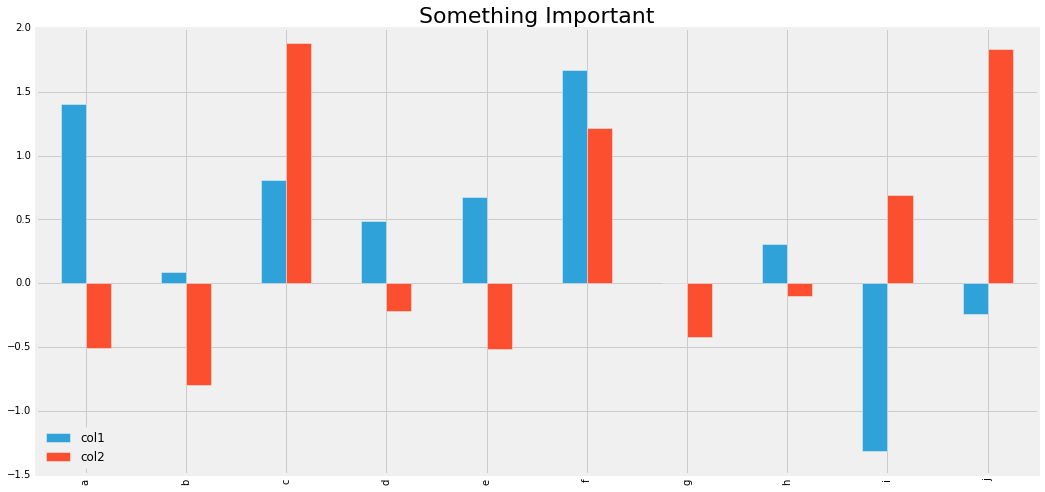

In [21]:
fig = df[['col1','col2']].plot(kind='bar', figsize=(16,8))
ax = plt.gca()
ax.set_title('Something Important', fontsize=22)
ax.legend(loc=3)

## E5. Do the same thing but with horizontal bars. Move the legend to the upper-right.

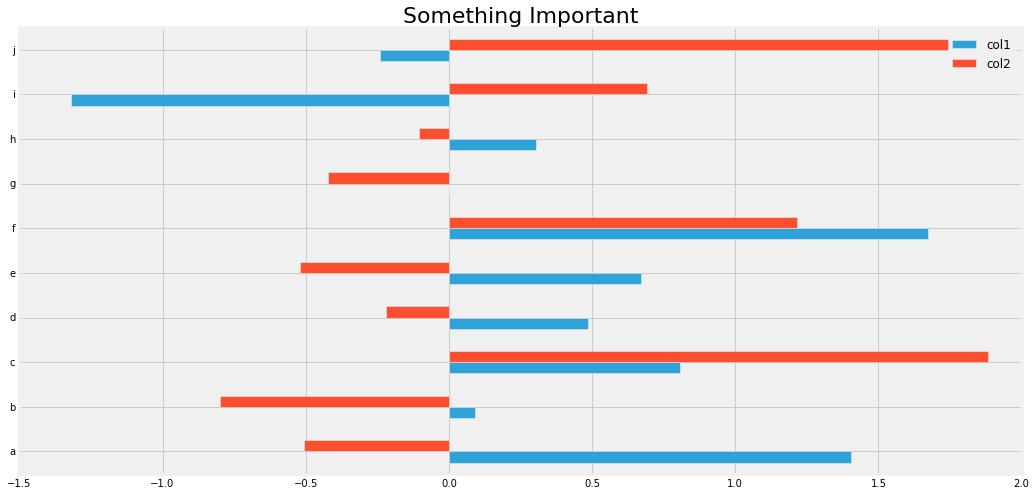

In [22]:
fig = df[['col1','col2']].plot(kind='barh', figsize=(16,8))
ax = plt.gca()

ax.set_title('Something Important', fontsize=22)
ax.legend(loc=1)

## We can use stacked bars

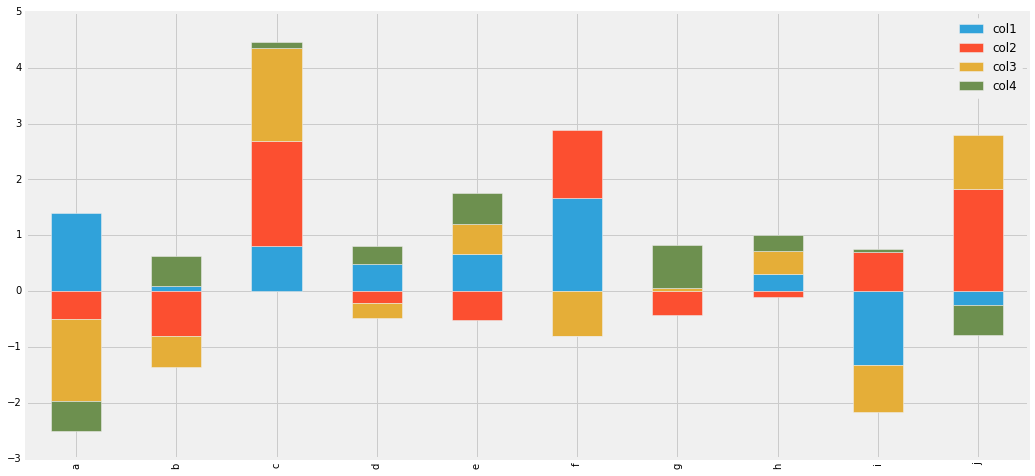

In [23]:
df.plot(kind='bar', stacked=True, figsize=(16,8))

## <ul> Must use on multiple columns

## Stacked works on hbar too

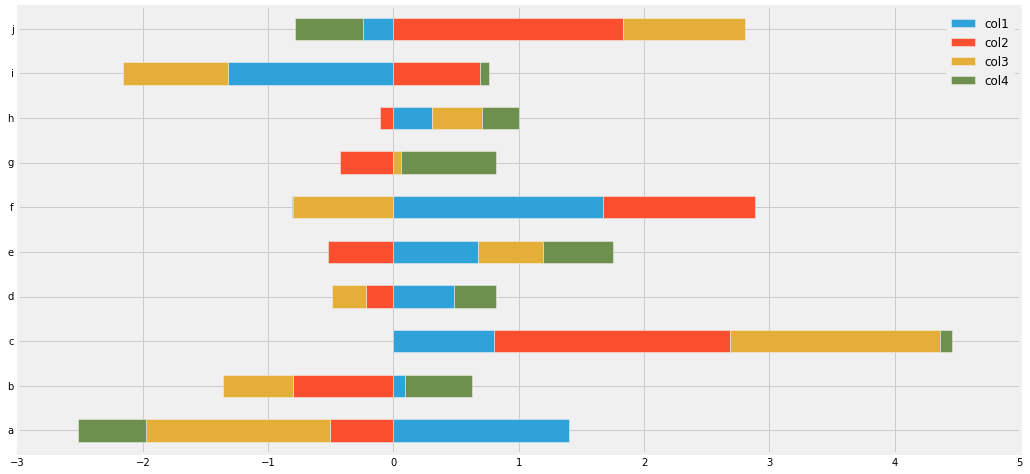

In [24]:
df.plot(kind='barh', stacked=True, figsize=(16,8))

## E6. Create a stacked bar chart using any two columns. Either vertical or horizontal.

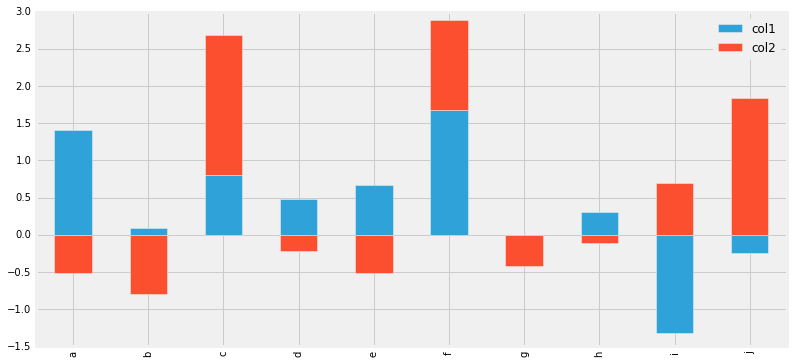

In [25]:
df[['col1', 'col2']].plot(kind='bar', stacked=True, figsize=(12,6))

# Scatter Plots

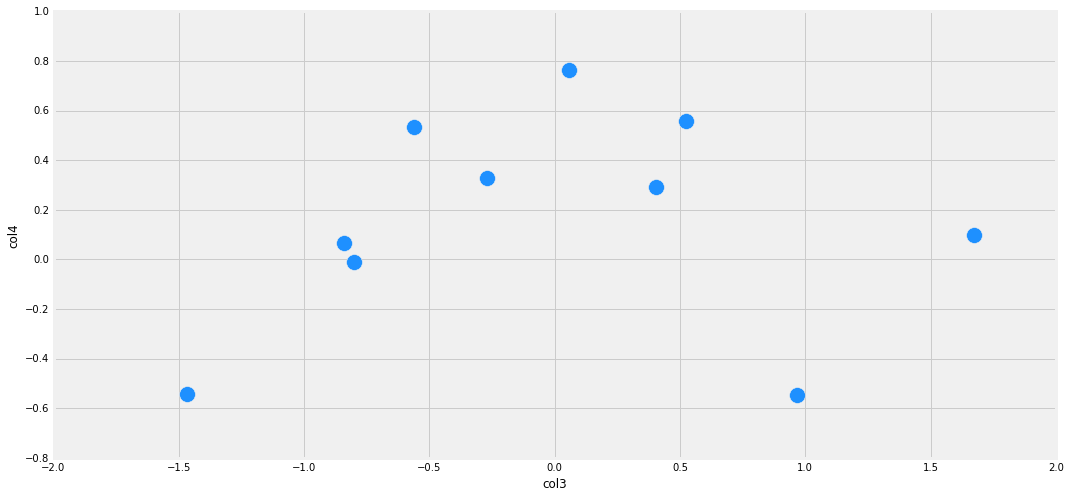

In [26]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',\
        figsize=(16,8), s=250)

## E7. Create a scatter plot using the DataFrame below. Adjust the size of each point so that it is the value of the y variable to the 4th power. \*_hint_ think list comprehension.

In [27]:
sp_dict = {'x': [1,2,3,4,5], 'y': [2,5,3,9,12]}
sp = pd.DataFrame(sp_dict)
sp

,x,y
0,1,2
1,2,5
2,3,3
3,4,9
4,5,12


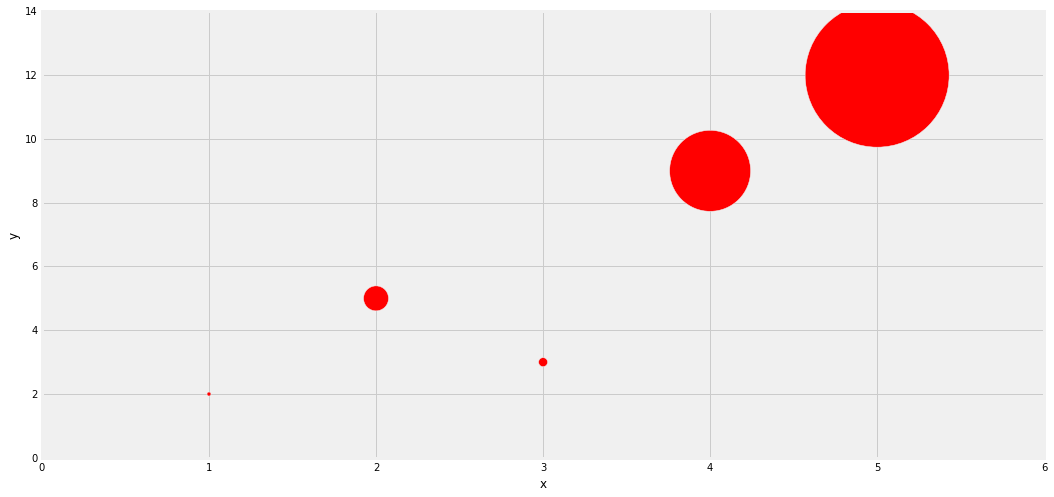

In [45]:
sp.plot(x='x', y='y', kind='scatter',\
        s=[x**4 for x in sp['y']], color='red', figsize=(16,8))

# Histograms

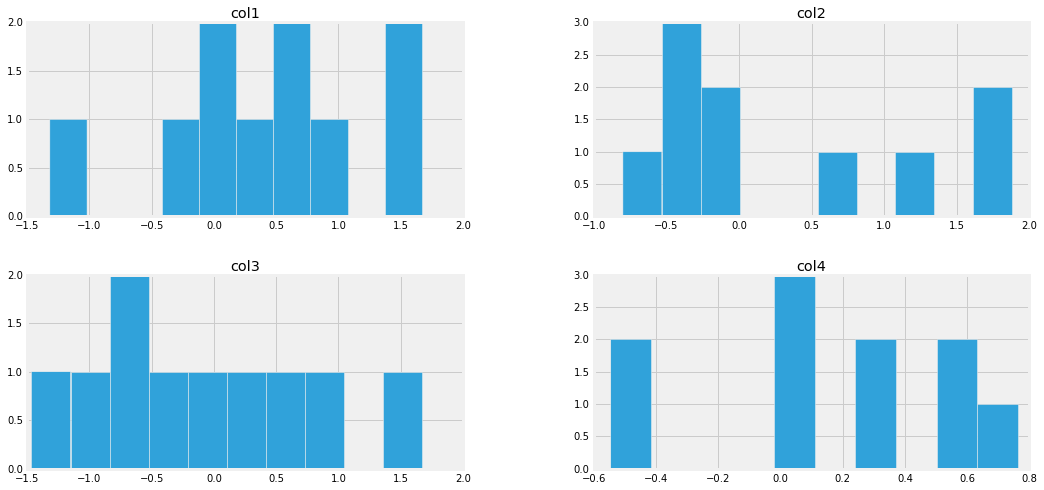

In [29]:
df.hist(figsize=(16,8));

## Single historgram

In [30]:
norm = np.random.standard_normal(5000)

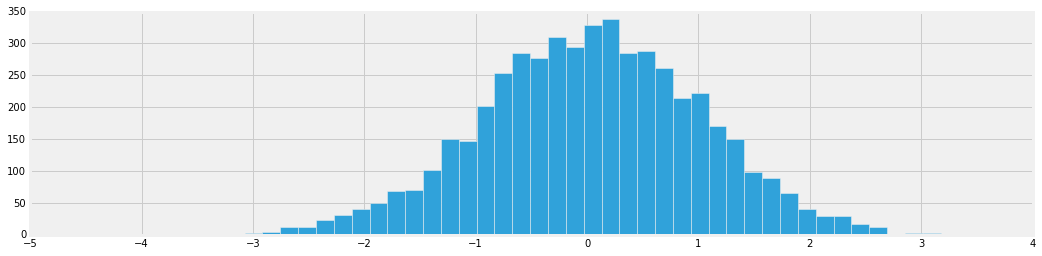

In [31]:
pd.Series(norm).hist(figsize=(16,4), bins=50)

## Bins param adjusts the no. of bins

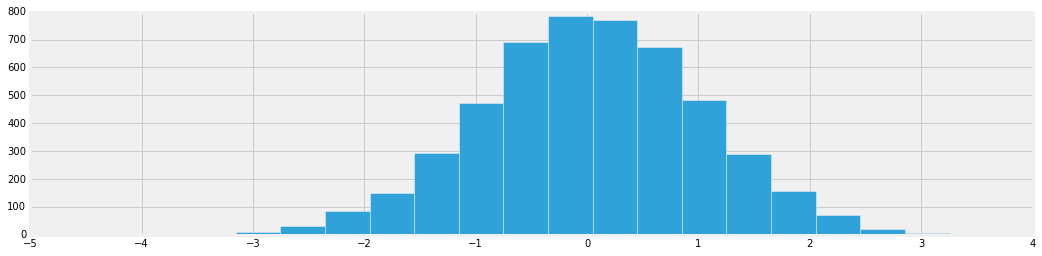

In [32]:
pd.Series(norm).hist(figsize=(16,4), bins=20)

## E8. Create a histogram of the poisson distribution using the parameters 5 and 1 million. Set the bins to 20.

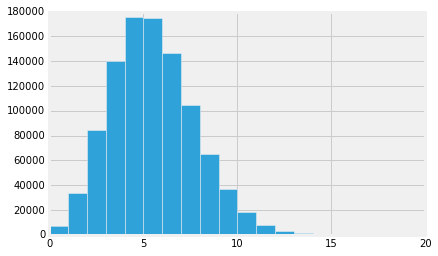

In [33]:
poi = pd.Series(np.random.poisson(5, 1000000))
poi.hist(bins=20)

## Understanding figures, subplots, and axes

<em style="font-size:26px">In matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container which contains all the objects representing axes, graphics, text, labels, etc. 

The axes (an instance of the class plt.Axes) is what we see below: a bounding box with ticks and labels, which will eventually contain other plot elements.</em>


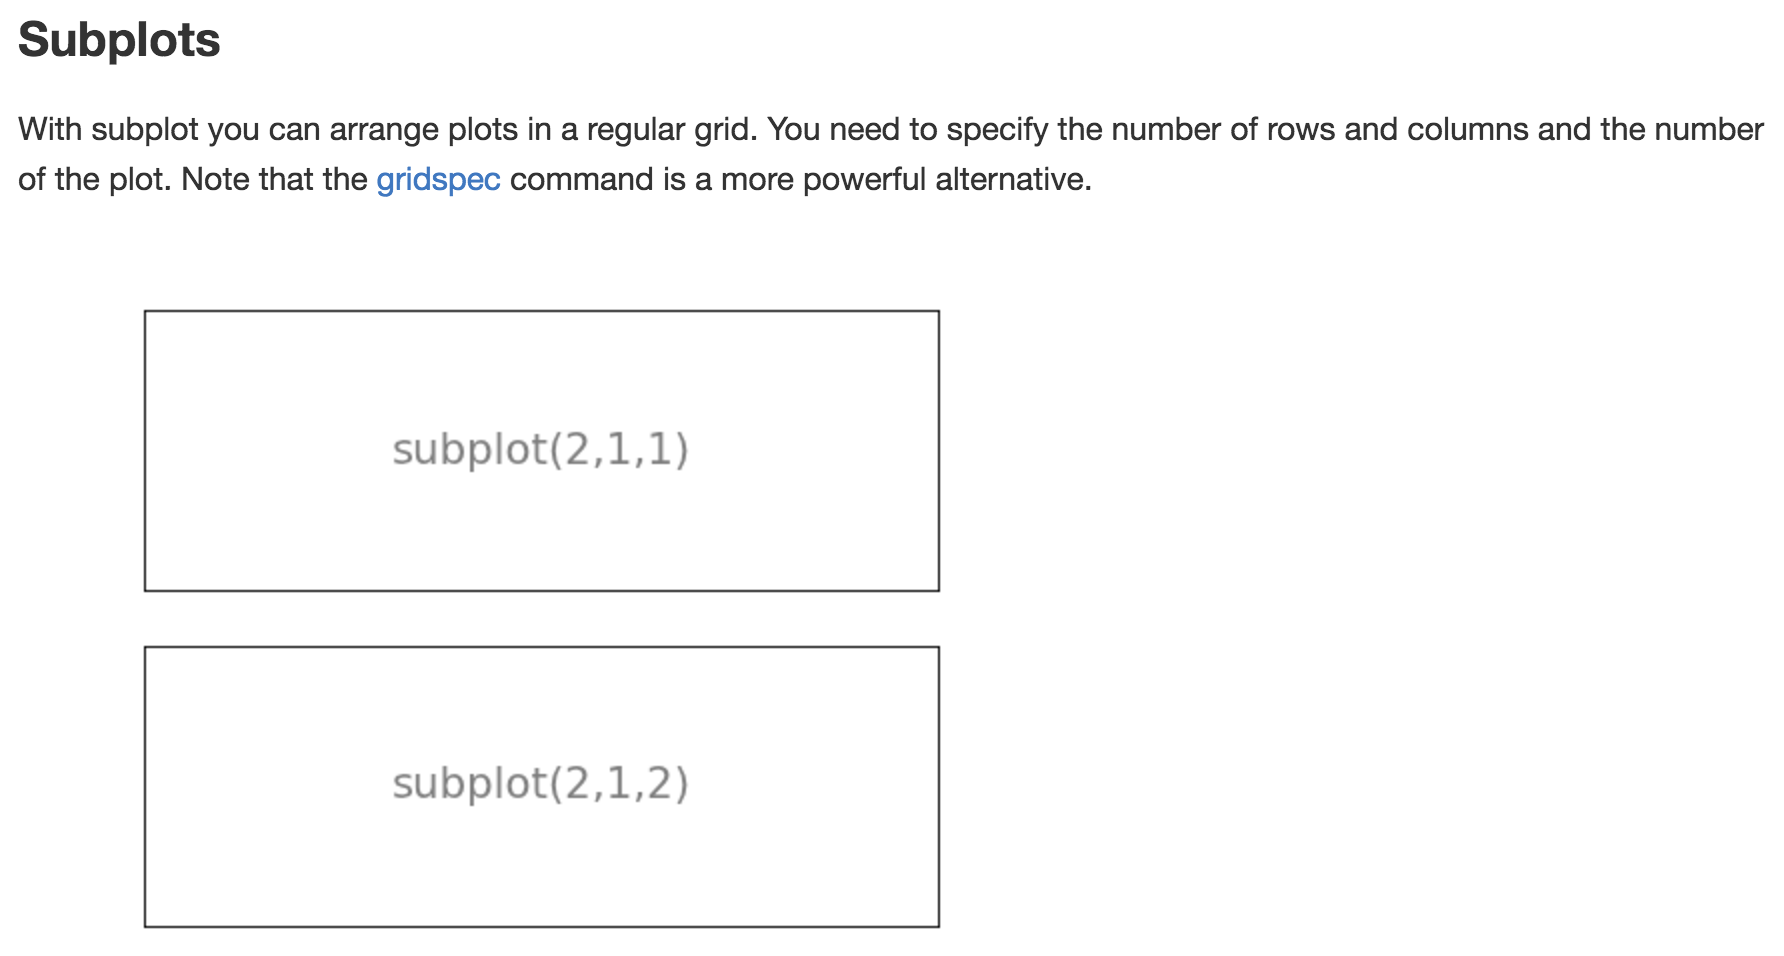

In [34]:
Image(PATH + 'subplots.png')

#### <ul> A 2 by 1 subplot arrangement

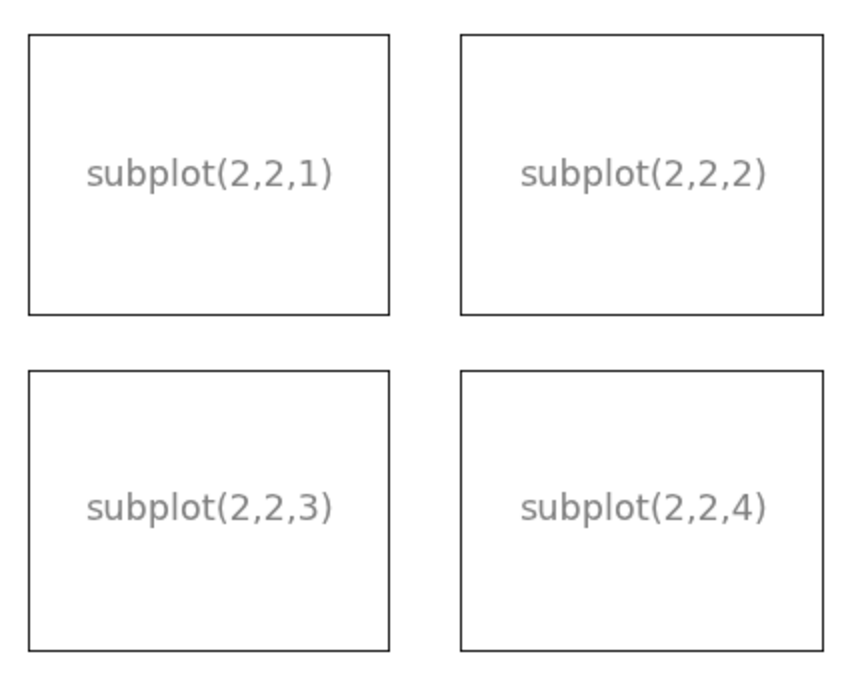

In [35]:
Image(PATH + 'subplots2.png')

#### A 2 by 2 arrangement

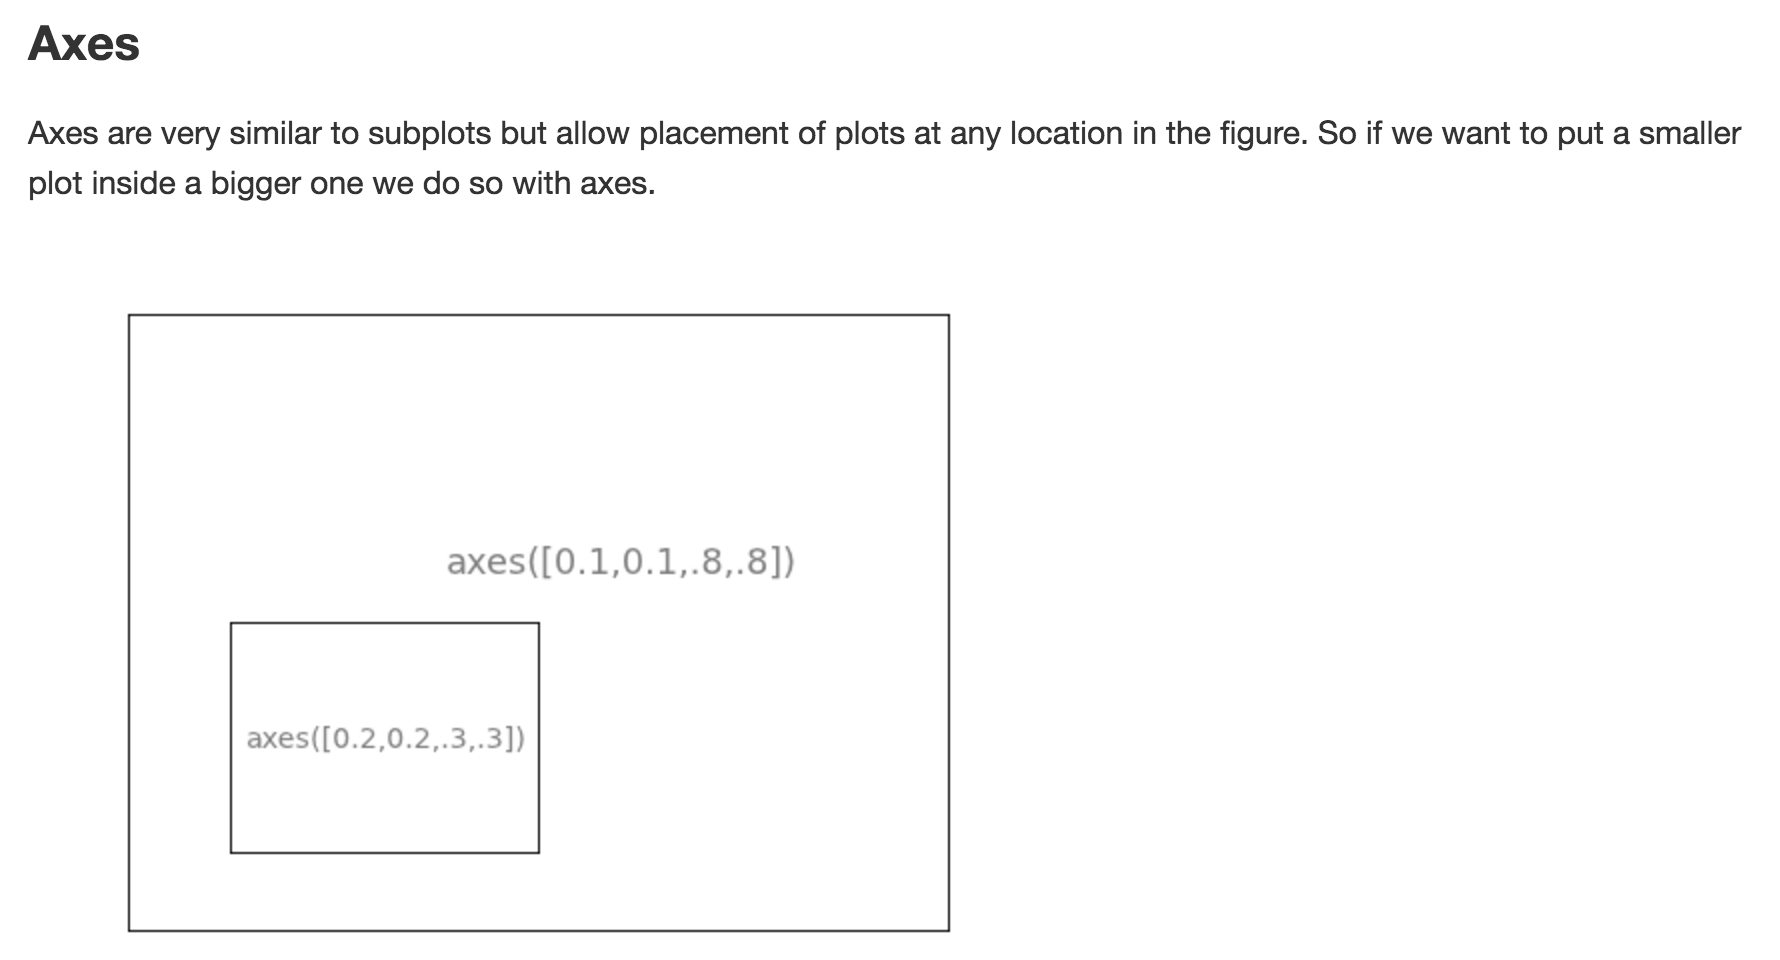

In [36]:
Image(PATH + 'axes.png')

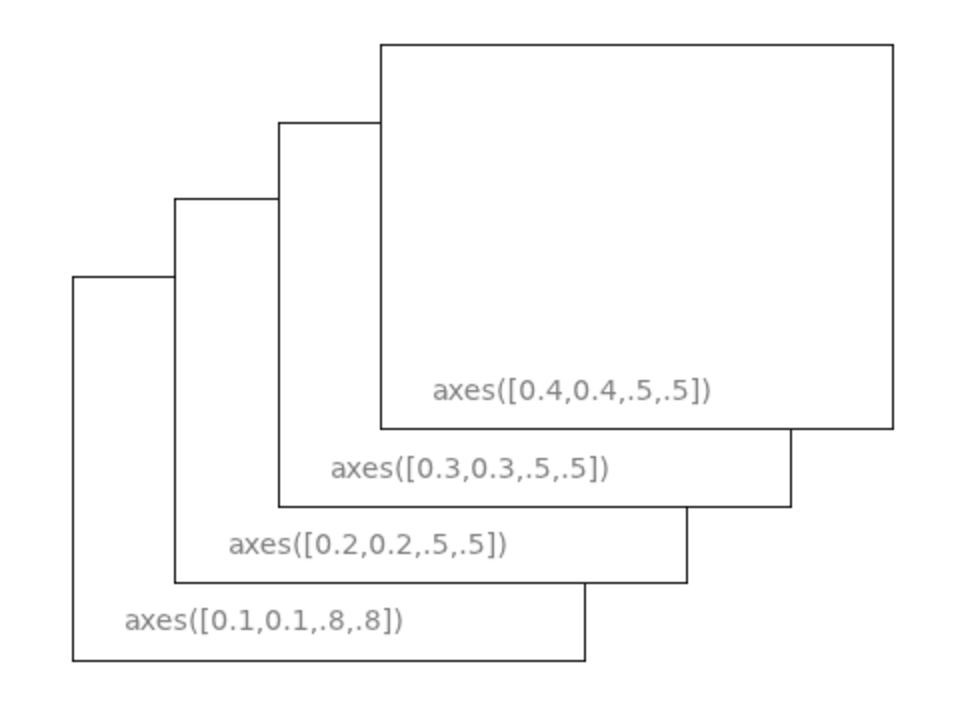

In [37]:
Image(PATH + 'axes2.png')

## Create an example

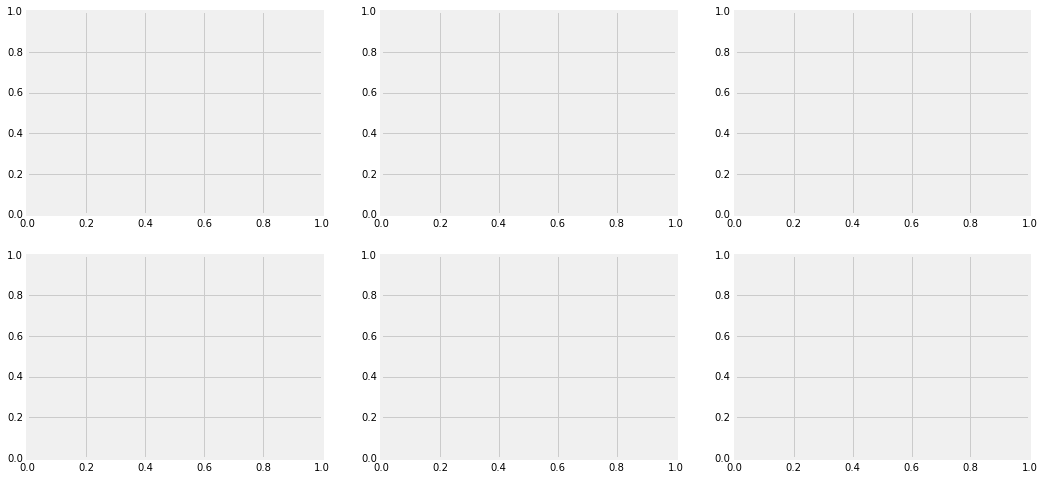

In [38]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

axes_details = type(axes)
fig_details = type(fig)

In [39]:
fig_details

matplotlib.figure.Figure

In [40]:
axes_details

numpy.ndarray

In [41]:
axes.shape

(2, 3)

In [42]:
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e66d410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ff51290>], dtype=object)

In [43]:
axes[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11feb3590>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ffeb3d0>], dtype=object)

In [44]:
axes[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

## Changing ticks on a subplot

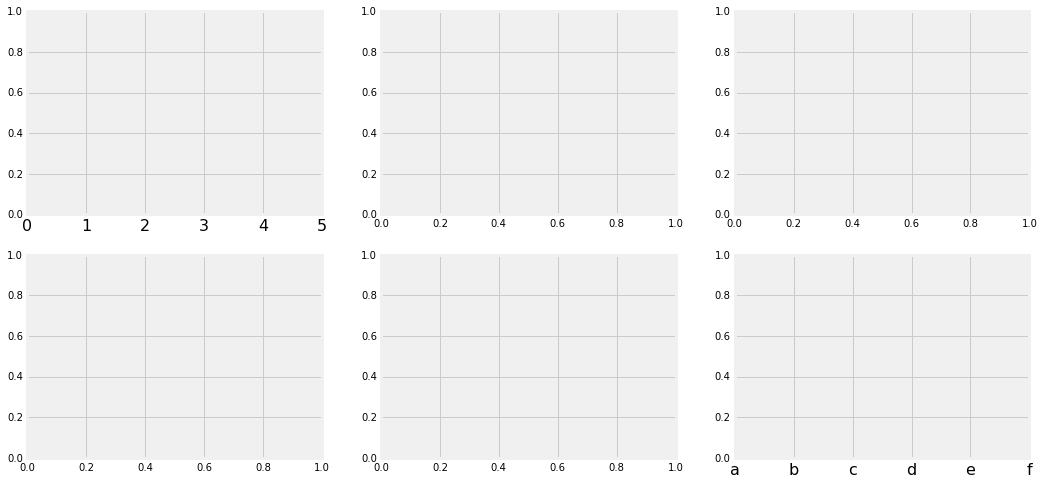

In [46]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

# change upper-left plot x ticks
axes[0][0].set_xticklabels([0,1,2,3,4,5], fontsize=16)

# change lower-right plot x ticks
axes[1][2].set_xticklabels(['a','b','c','d','e','f'], fontsize=16)

## Setting titles

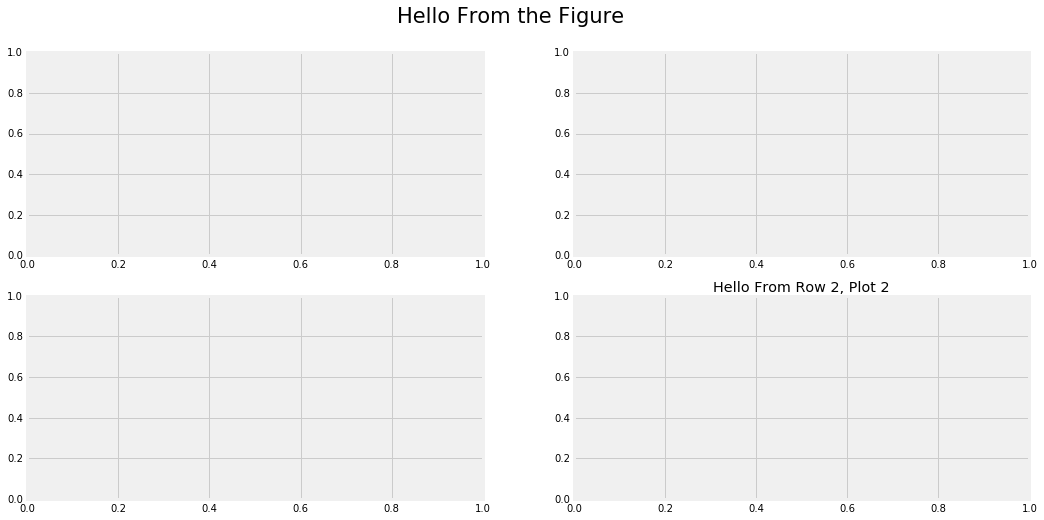

In [47]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# set title for bottom-right plot
axes[1][1].set_title('Hello From Row 2, Plot 2')

fig.suptitle('Hello From the Figure', fontsize=21)

## Independent Exercise

- Create a plot that is 1 across and three long
- Create a line 10 elements long with a postive slope in the first plot 
- Color it green
- Give it a title
- In the second plot, create a line (10 elements) with a negative slope
- Give it a title
- Color it red
- In the last plot, plot both a line with an increasing slope and a decreasing slope
- Give that a title as well
- Finally, give the entire plot a main title
- Now using those same negative and positive values, create a DataFrame from them
- Using that DataFrame, create two scatterplots using pandas plotting one with a positive slope and one with a negative slope. Make sure to adjust the marker size so that the dots are large enough to view easily.
- Now using subplots with matplotlib, draw both scatterplots on a single subplot
- Using .set_xlim() change the scatter plot so that it starts at zero

## Create a plot that is 1 across and 3 long

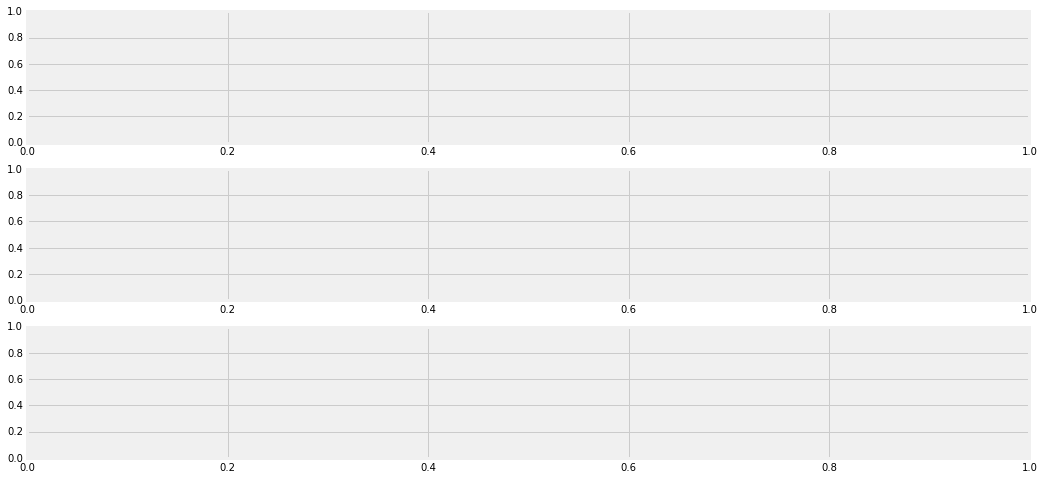

In [48]:
fig, axes = plt.subplots(3,1, figsize=(16,8))

In [58]:
axes.shape

(3,)

## Plot a line with an increasing slope in the top subplot

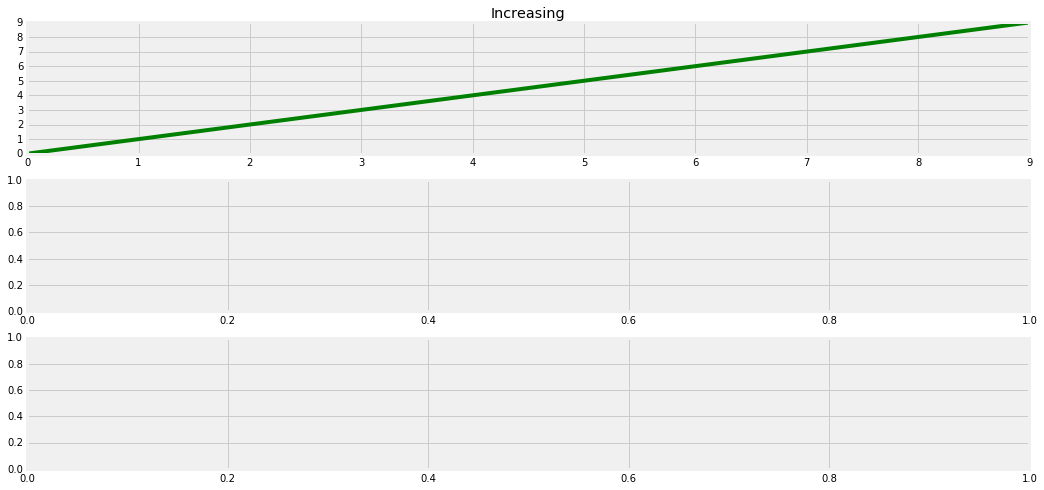

In [49]:
fig, axes = plt.subplots(3,1, figsize=(16,8))

pos_slope = [0,1,2,3,4,5,6,7,8,9]
neg_slope = [9,8,7,6,5,4,3,2,1,0]

# Increasing slope
axes[0].plot(pos_slope, color='g')
axes[0].set_title('Increasing')

## Add a line with a negative slope

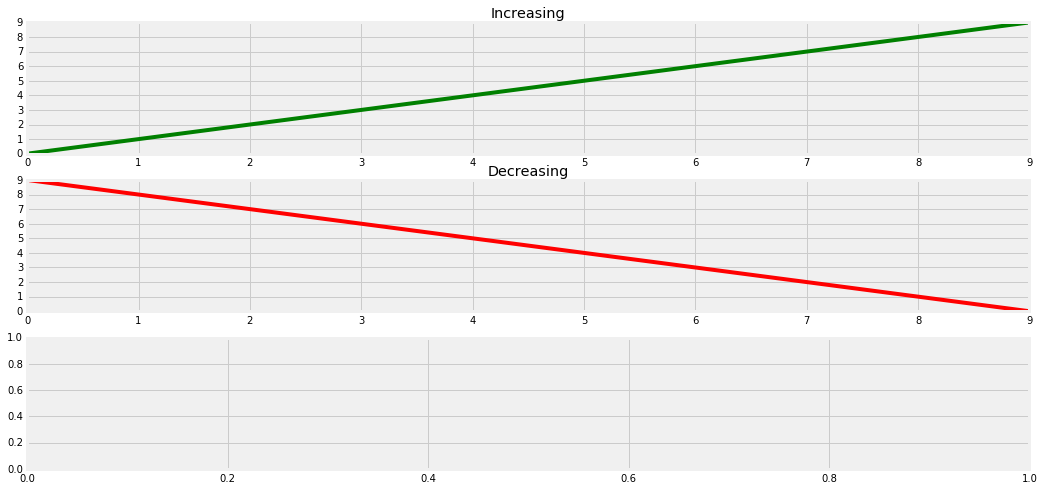

In [50]:
fig, axes = plt.subplots(3,1, figsize=(16,8))

pos_slope = [0,1,2,3,4,5,6,7,8,9]
neg_slope = [9,8,7,6,5,4,3,2,1,0]

# Increasing slope
axes[0].plot(pos_slope, color='g')
axes[0].set_title('Increasing')

# Decreasing slope
axes[1].plot(neg_slope, color='r')
axes[1].set_title('Decreasing')

## Add both to the last subplot

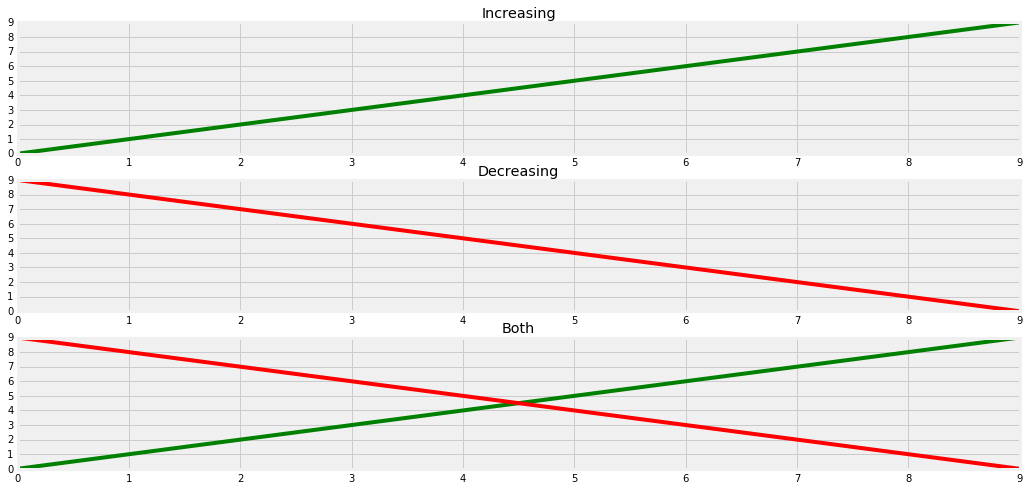

In [51]:
fig, axes = plt.subplots(3,1, figsize=(16,8))

pos_slope = [0,1,2,3,4,5,6,7,8,9]
neg_slope = [9,8,7,6,5,4,3,2,1,0]

# Increasing slope
axes[0].plot(pos_slope, color='g')
axes[0].set_title('Increasing')

# Decreasing slope
axes[1].plot(neg_slope, color='r')
axes[1].set_title('Decreasing')

# Both
axes[2].plot(pos_slope, color='g')
axes[2].plot(neg_slope, color='r')
axes[2].set_title('Both')

## Add a title above all the plots

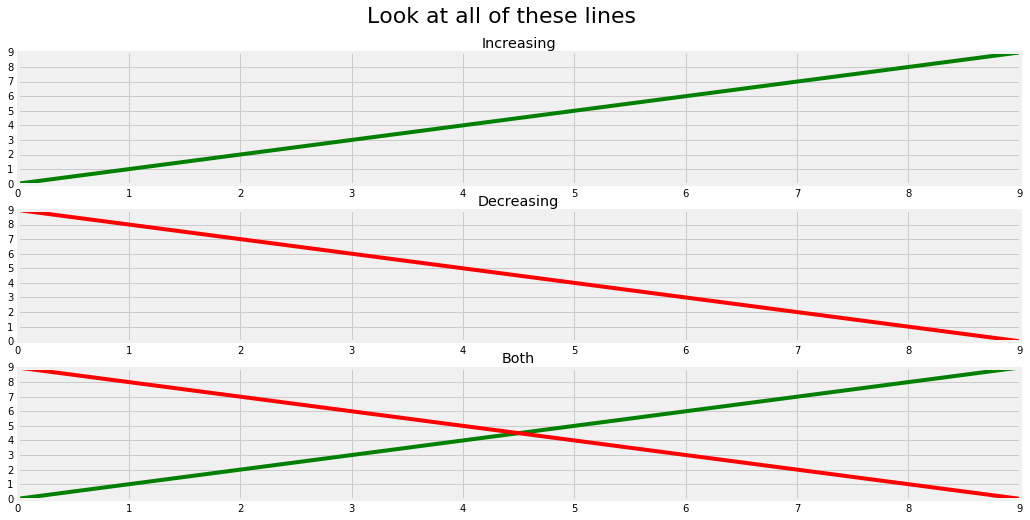

In [52]:
fig, axes = plt.subplots(3,1, figsize=(16,8))

pos_slope = [0,1,2,3,4,5,6,7,8,9]
neg_slope = [9,8,7,6,5,4,3,2,1,0]

# Increasing slope
axes[0].plot(pos_slope, color='g')
axes[0].set_title('Increasing')

# Decreasing slope
axes[1].plot(neg_slope, color='r')
axes[1].set_title('Decreasing')

# Both
axes[2].plot(pos_slope, color='g')
axes[2].plot(neg_slope, color='r')
axes[2].set_title('Both')

fig.suptitle('Look at all of these lines', fontsize=22)

## Create two scatter plots with those lines using pandas

In [53]:
lines = pd.DataFrame({'pos': pos_slope, 'neg': neg_slope})
lines

,neg,pos
0,9,0
1,8,1
2,7,2
3,6,3
4,5,4
5,4,5
6,3,6
7,2,7
8,1,8
9,0,9


## x is negative and y is positive

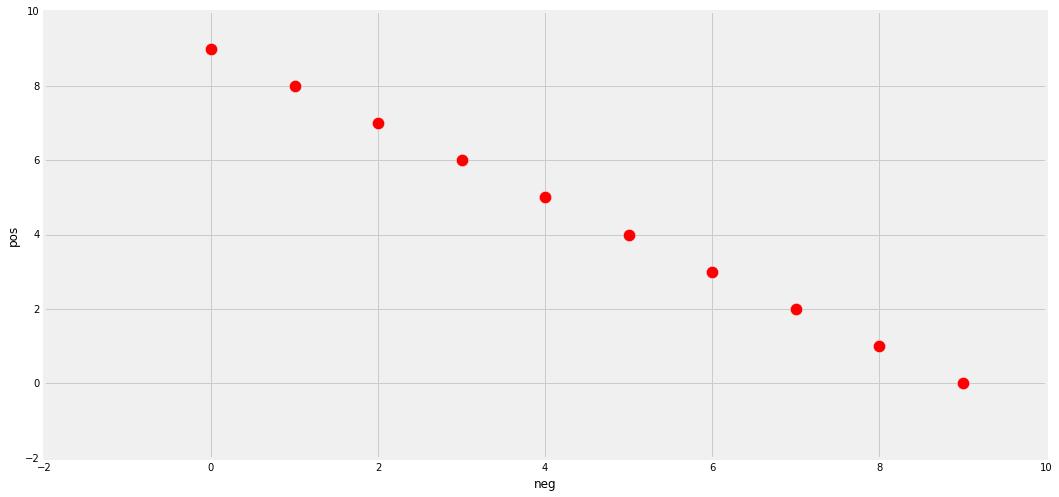

In [54]:
lines.plot(kind='scatter', x='neg', y='pos',\
           figsize=(16,8), s=150, color='r')

## x is positive and y is negative

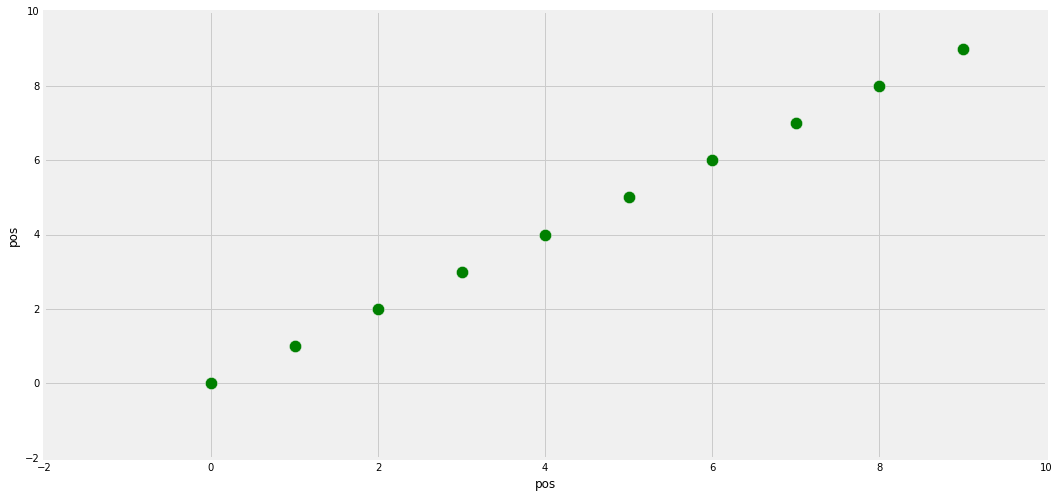

In [55]:
lines.plot(kind='scatter', x='pos', y='pos',\
           figsize=(16,8), s=150, color='g')

## Create two scatter plots on the same subplot

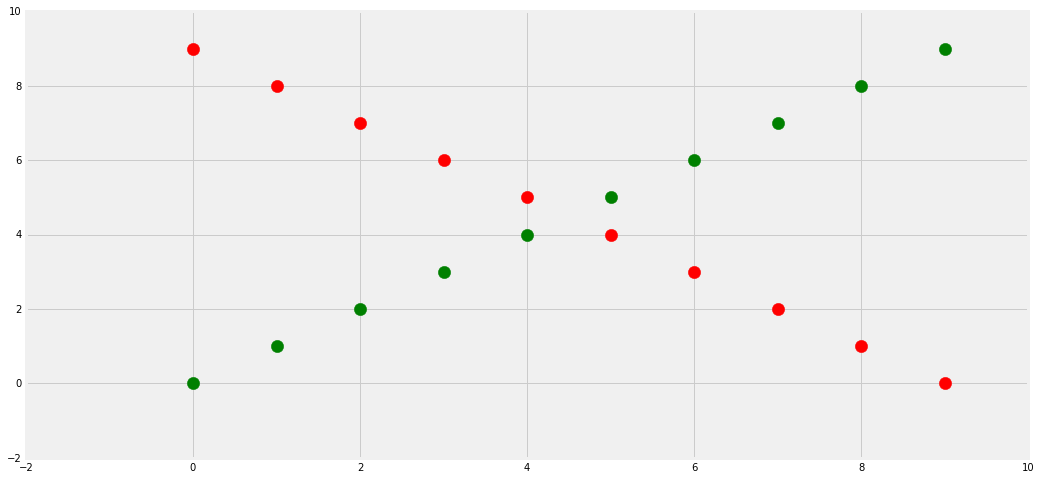

In [56]:
# Single subplot
fig, axis = plt.subplots(1,1, figsize=(16,8))

# Positive sctter
axis.scatter(x=lines['pos'], y=lines['pos'], color='g', s=150)

# Negative scatter
axis.scatter(x=lines['pos'], y=lines['neg'], color='r', s=150)

## Set the xlim

(0, 10)

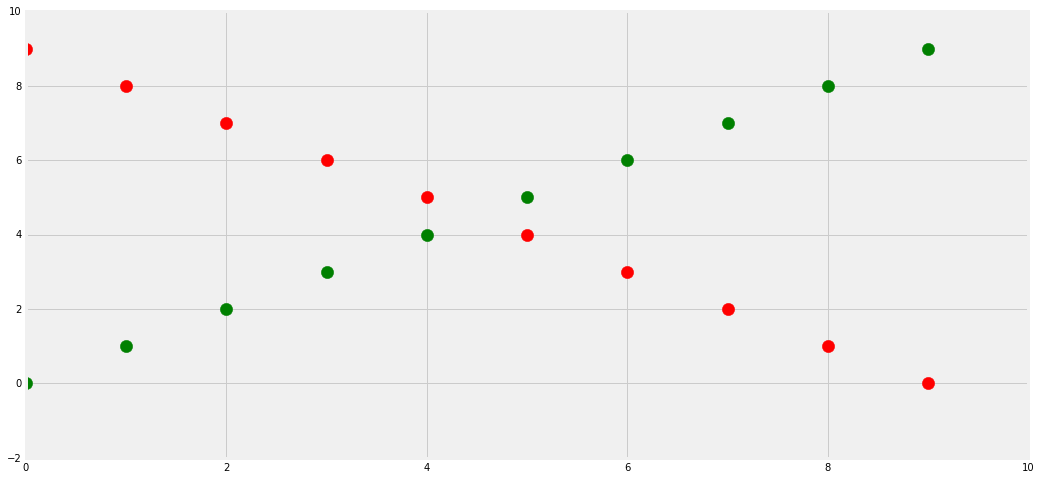

In [57]:
# Single subplot
fig, axis = plt.subplots(1,1, figsize=(16,8))

# Positive sctter
axis.scatter(x=lines['pos'], y=lines['pos'], color='g', s=150)

# Negative scatter
axis.scatter(x=lines['pos'], y=lines['neg'], color='r', s=150)

# Set the xlim
axis.set_xlim(0,10)